In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import tensorflow

2025-11-30 21:12:19.540737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764533539.576957     605 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764533539.589188     605 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764533539.636239     605 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764533539.636266     605 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764533539.636268     605 computation_placer.cc:177] computation placer alr

In [2]:
signnames = pd.read_csv("signnames.csv")
signnames


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [3]:
rand_test_dir = "./data/test_data/*.png"
images = glob.glob(rand_test_dir)

rand_testx = []
rand_test_name = [
    "Speed limit (80km/h)", 
     "General caution", 
     "Road work", 
     "Speed limit (70km/h)", 
     "Priority road"
]
rand_testy = []

for name in rand_test_name:
    ind = signnames.index[signnames["SignName"] == name][0]
    rand_testy.append(signnames["ClassId"][ind])

for index, fname in enumerate(images):
    image = cv2.imread(fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32))
    print(image.shape)
    rand_testx.append(image)


rand_testx = np.array(rand_testx, np.uint8)
print(rand_testx.shape)

rand_testy = np.array(rand_testy)
    


(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(5, 32, 32, 3)


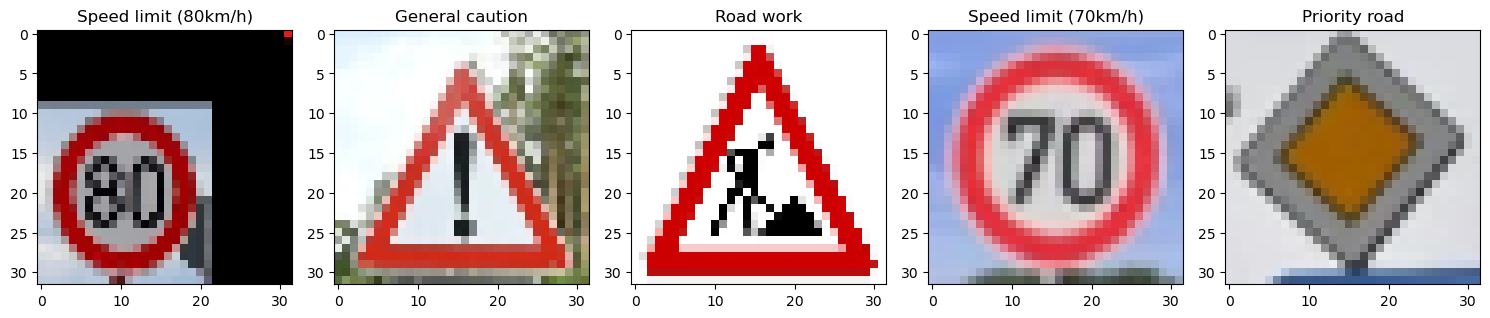

In [4]:
plt.figure(figsize=(15, 15))

for index, (image, label) in enumerate(zip(rand_testx, rand_test_name)):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image)
    plt.title(label)

plt.tight_layout()
plt.show()
%matplotlib inline

In [ ]:
checkpoint = tf.train.Checkpoint()
checkpoint.restore(tf.train.latest_checkpoint("./ckpt")

In [ ]:
rand_testy

In [ ]:
rand_testx